# Kaprekar's routine, constants and carpets

## Dattatreya Ramachandra Kaprekar

![D. R. Kaprekar](kaprekar.gif)

Dattatreya Ramachandra Kaprekar (Dahanu, Maharastra, January 17, 1905 - Deolali, Nashik District, Maharastra, June 1, 1986, Kerala, India) was an indian mathematician whose name is associated with multiple concepts in number theory. He described the Kaprekar, harshad, self and other several of classes of natural numbers, and is also known for discovering the Kaprekar's constant.

## Kaprekar's routine

It is an iterative algorithm consisting of the following steps:

  1. Choose any natural number $n$ in a given number base $b$.
  2. Create a new number $\alpha$ by sorting the digits of $n$ in descending order.
  3. Create a new number $\beta$ by sorting the digits of $n$ in ascending order.
  4. Substract $\alpha - \beta$ to produce the next $n$ number.
  5. Repeat from step 2 with the new $n$ number.

When the $\alpha$ and $\beta$ numbers are created may have leading zeros, wich could be discarted or preserved.

In [1]:
def kaprekar(n, pad=None):
    """
    Base 10 Kaprekar's mapping for the given number
    """
    d = str(n)
    s = sorted(d.ljust(pad, "0") if pad and pad > len(d) else d)
    return int("".join(reversed(s))) - int("".join(s))

## Kaprekar's constants

The consecutive application of the Kaprekar's routine may result on repeating cicles or reach fixing points. These fixing points are called Kaprekar's constants.

### 6174

The 6174 number is the most famous Kaprekar's constant. It is obtained by applying at most seven iterations of the Kaprepar's routine for any base 10 four-digits number, not repdigit and preserving the leading zeros.

### 495

The second most famous Kaprekar's constant is 495. It is obtained similarly as the 6174 constant but using three-digits numbers.

## Kaprekar's carpets

Using the Kaprekar's routine with base 10 numbers when the leading zeros are preserved, Kaprekar's carpets can be built for the four-digits and three-digits cases.

The carpet is a matrix of $10^{d}$ entries, where $d$ is the number of digits for the case. Each entry represents a number in the range $[0, 10^{d} - 1]$, contains the number of iterations needed to reach the Kaprekar's constant and are arranged so that the columns represent the two least significant digits of the number, while the rows represent the two most significant digits.

In [2]:
from copy import deepcopy
from PIL import Image

class Carpet():
    """
    Base 10 Kaprekar's carpet for four or three digits
    """
    
    __rgb_palette = {
        "none": (0x00, 0x00, 0x00),
        "border": (0x00, 0x00, 0x00),
        0: (0xFF, 0xFF, 0xFF),
        1: (0xFF, 0xDB, 0x01),
        2: (0x47, 0xFF, 0x01),
        3: (0x01, 0xFE, 0x91),
        4: (0x00, 0x91, 0xFE),
        5: (0x48, 0x01, 0xFF),
        6: (0xFE, 0x00, 0xDA),
        7: (0xFE, 0x00, 0x00)
    }
    
    __bw_palette = {
        "none": (0x00, 0x00, 0x00),
        "border": (0x00, 0x00, 0x00),
        0: (0x1F, 0x1F, 0x1F),
        1: (0x3F, 0x3F, 0x3F),
        2: (0x5F, 0x5F, 0x5F),
        3: (0x7F, 0x7F, 0x7F),
        4: (0x9F, 0x9F, 0x9F),
        5: (0xBF, 0xBF, 0xBF),
        6: (0xDF, 0xDF, 0xDF),
        7: (0xFF, 0xFF, 0xFF)

    }
    
    
    @staticmethod
    def palette(name):
        if name == "rgb":
            return deepcopy(Carpet.__rgb_palette)
        if name == "bw":
            return deepcopy(Carpet.__bw_palette)
        raise ValueError("unknown palette")
    
    @staticmethod
    def kaprekar(n, pad=None):
        """
        Kaprekar's mapping for the given number
        """
        d = str(n)
        s = sorted(d.ljust(pad, "0") if pad and pad > len(d) else d)
        return int("".join(reversed(s))) - int("".join(s))
    
    
    def __init__(self, digits=4, cell_size=5, border_size=1, palette="rgb"):
        """
        Constructor
        """
        self.setDigits(digits)
        self.setCellSize(cell_size)
        self.setBorderSize(border_size)
        self.setPalette(palette)
    
    
    def __coord(self, x, y):
        """
        Get the coordinate of the upper left pixel for the given cell
        """
        scale = self.__cell_size + self.__border_size
        return (x * scale + self.__border_size, y * scale + self.__border_size)
    
    
    def setDigits(self, digits):
        """
        Set the number of digits
        """
        if digits != 3 and digits != 4:
            raise ValueError("only 3 and 4 are valid for the digits argument")
        
        self.__n = digits
        self.__modified = True
    
    def setCellSize(self, cell_size):
        """
        Set the cell size
        """
        if cell_size < 1:
            raise ValueError("the cell size must be greater than zero")
        
        self.__cell_size = cell_size
        self.__modified = True
    
    def setBorderSize(self, border_size):
        """
        Set the cell border size
        """
        if border_size < 0:
            raise ValueError("the border size cannot be negative")
        
        self.__border_size = border_size
        self.__modified = True
    
    def setPalette(self, palette):
        """
        Set the carpet palette
        """
        if isinstance(palette, str):
            self.__palette = Carpet.palette(palette)
        elif palette:
            palette = deepcopy(palette)
            for prop in [ "none", "border" ]:
                if not prop in palette:
                    palette[prop] = Carpet.__bw_palette[prop]
            self.__palette = palette
        self.__modified = True
    
    
    def getCellSize(self):
        """
        Get the cell size
        """
        return self.__cell_size
    
    def getBorderSize(self):
        """
        Get the border size
        """
        return self.__border_size
    
    def getPalette(self):
        """
        Get the palette
        """
        return deepcopy(self.__palette)
        
    def getImage(self):
        """
        Get the carpet image
        """
        self.build()
        return self.__img.copy()
    
    
    def build(self):
        """
        Build the Kaprekar's carpet
        """
        if not self.__modified:
            return
        
        zeros, fit = divmod(self.__n, 2)
        rows = 10 ** zeros
        cols = 10 ** (zeros + fit)
        
        self.__img = Image.new(mode="RGB", size=self.__coord(cols, rows), color=self.__palette["border"])
        pixel = self.__img.load()
        
        for n in range(10 ** self.__n):
            row, col = divmod(n, cols)

            k_0 = n
            k_1 = Carpet.kaprekar(k_0, self.__n)
            color = None

            if k_1:
                i = 0
                while k_1 != k_0:
                    k_0 = k_1
                    k_1 = Carpet.kaprekar(k_0, self.__n)
                    i += 1
                color = self.__palette[i] if i in self.__palette else 3 * (i,)
            else:
                color = self.__palette["none"]

            x, y = self.__coord(col, row)
            for l in range(x, x + self.__cell_size):
                for m in range(y, y + self.__cell_size):
                    pixel[l, m] = color
        
        self.__modified = False

In [3]:
from IPython.display import display

# Carpet and BW palette with red constant
carpet = Carpet()
bw = Carpet.palette("bw")
bw[0] = (0xFF, 0x00, 0x00)

def saveAndDisplay(img, name):
    """
    Save and display the given image
    """
    img.save(name)
    display(img)

### Four-digits carpet

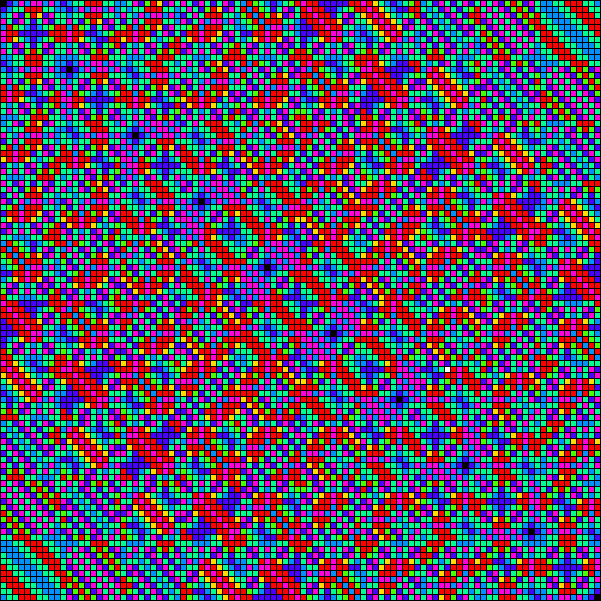

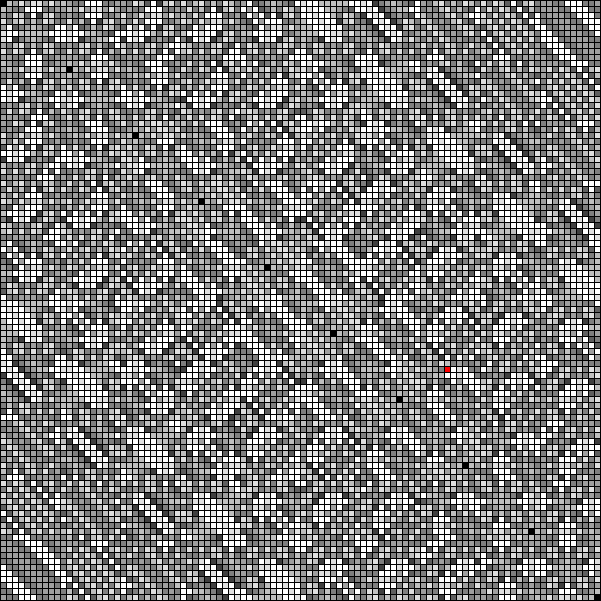

In [4]:
# RGB carpet
saveAndDisplay(carpet.getImage(), "carpet4_rgb.png")

# BW carpet
carpet.setPalette(bw)
saveAndDisplay(carpet.getImage(), "carpet4_bw.png")

### Three-digits carpet

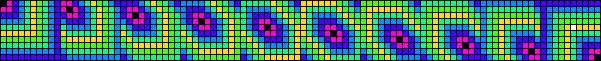

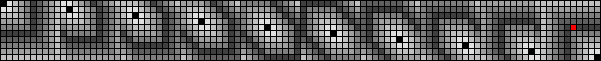

In [5]:
# RGB carpet
carpet.setDigits(3)
carpet.setPalette("rgb")
saveAndDisplay(carpet.getImage(), "carpet3_rgb.png")

# BW carpet
carpet.setPalette(bw)
saveAndDisplay(carpet.getImage(), "carpet3_bw.png")